In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


df = pd.read_csv("./smart_discount_analyzer_dataset_50k.csv", encoding='latin1')


df["ReviewDate"] = 

df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          50000 non-null  int64  
 1   ProductID        50000 non-null  object 
 2   ProductCategory  50000 non-null  object 
 3   ProductName      50000 non-null  object 
 4   Discount(%)      50000 non-null  float64
 5   SalesAmount      50000 non-null  float64
 6   CustomerReview   50000 non-null  object 
 7   ReviewDate       50000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.1+ MB


In [2]:
## 1.1 we will use the ProductCategory column to analyze the distribution of products in the dataset

df["ProductCategory"].value_counts()
df = df[df["ProductCategory"] == "Electronics"]



In [ ]:
plt.figure()
sns.lineplot(df[])

<function matplotlib.pyplot.show(close=None, block=None)>

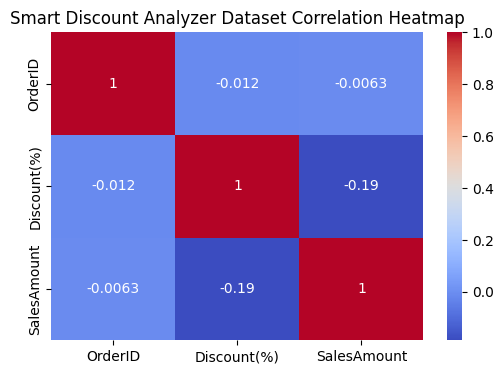

In [3]:
## we will us the heatmap for both the datasets to visualize the correlation between different numerical features
## For that we will use seaborn library
## Also we will filter out the non numerical columns from both the datasets

df_heat = df.select_dtypes(include=['float64', 'int64'])



## Smart Discount Analyzer Dataset heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_heat.corr(), annot=True, cmap="coolwarm")
plt.title("Smart Discount Analyzer Dataset Correlation Heatmap")
plt.show



In [4]:

## we will also check the seasonality pattern for the smart discount analyser also

df["date"] = pd.to_datetime(df["ReviewDate"], errors="coerce")
df.sort_values(by=["date"], inplace=True)
df["year"] = df["date"].dt.year
df["year"].value_counts()

year
2024    4957
2025    3448
Name: count, dtype: int64

<Axes: xlabel='month', ylabel='count'>

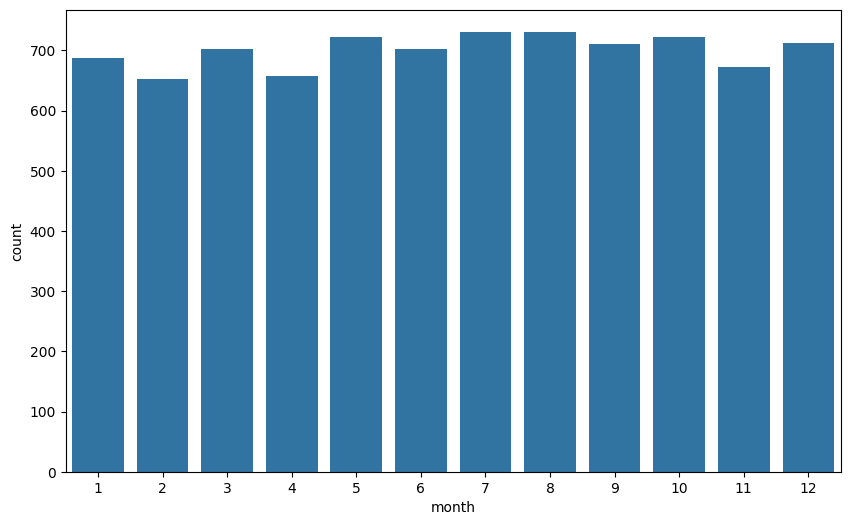

In [5]:
df["month"] = df["date"].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(x="month", data=df)


<Axes: title={'center': 'Distribution of Reviews by Month'}, xlabel='month', ylabel='Discount(%)'>

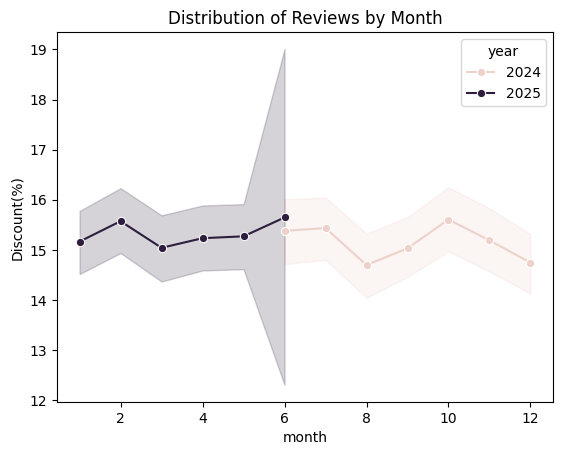

In [6]:
plt.title("Distribution of Reviews by Month")
sns.lineplot(data=df, x="month", y="Discount(%)", hue="year", marker="o")



## Discount cycles and seasonlaity pattern 

<Axes: xlabel='date'>

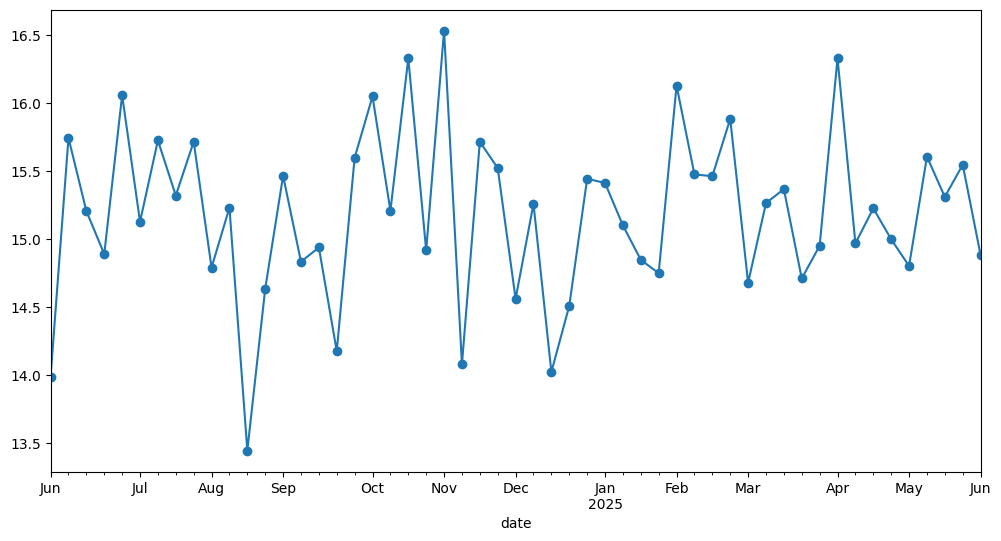

In [7]:
#This is weekly discount size for the smart discount analyser dataset

## Making sure that the date is clean 

df = df.dropna(subset=["date"])

weekly_discount_size = (df.resample("W", on="date")["Discount(%)"].mean())

weekly_discount_size.plot(figsize=(12, 6),marker="o")

/var/folders/st/r78_rxtx0hd_yr_r8qtl08_c0000gn/T/ipykernel_81621/934200681.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_discount_size = (df.resample("M", on="date")["Discount(%)"].mean())


<Axes: xlabel='date'>

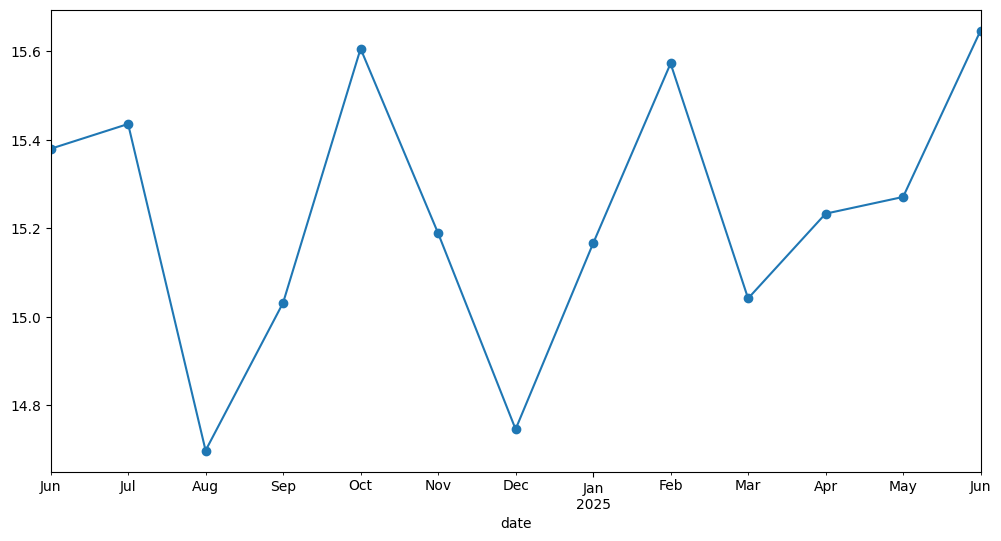

In [8]:
## Average discount size per month for the smart discount analyser dataset
monthly_discount_size = (df.resample("M", on="date")["Discount(%)"].mean())

monthly_discount_size.plot(figsize=(12, 6), marker="o")


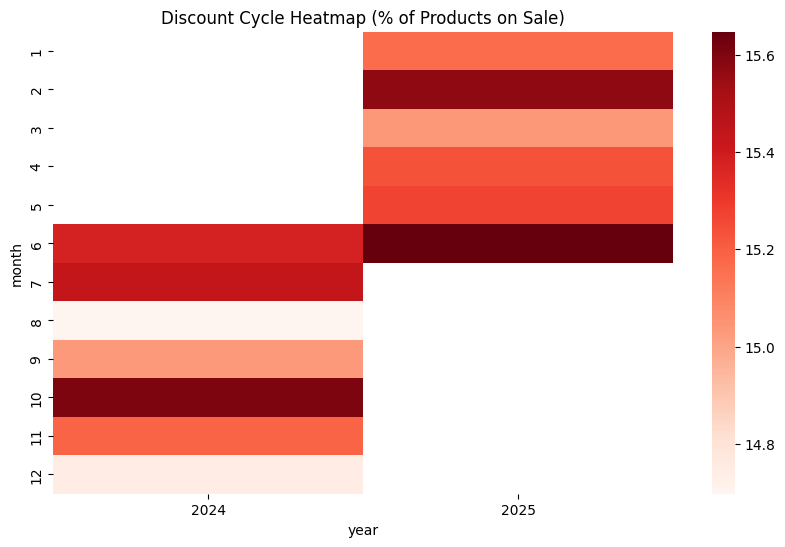

In [9]:
## Now, we will also use the year-month heatmap to visualize the average discount size across different months and years


df_index = df.set_index("date").sort_index()
df["years"] = df_index.index.year
df["month"] = df_index.index.month

pivot_discount = df_index.pivot_table(values="Discount(%)", index="month", columns="year", aggfunc="mean")
pivot_discount.head()
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_discount, cmap="Reds", annot=False)
plt.title("Discount Cycle Heatmap (% of Products on Sale)")
plt.show()


In [10]:
df["weekday"] = df.index.weekday
plt.figure(figsize=(10, 6))

sns.countplot(x="weekday", data=df)


AttributeError: 'Index' object has no attribute 'weekday'

In [11]:
df.sort_values(by=["ReviewDate","Discount(%)"] , inplace=True)
df_index = df.set_index("ReviewDate").sort_index()



OrderID            0
ProductID          0
ProductCategory    0
ProductName        0
Discount(%)        0
SalesAmount        0
CustomerReview     0
ReviewDate         0
date               0
year               0
month              0
years              0
dtype: int64


<Axes: xlabel='year', ylabel='Discount(%)'>

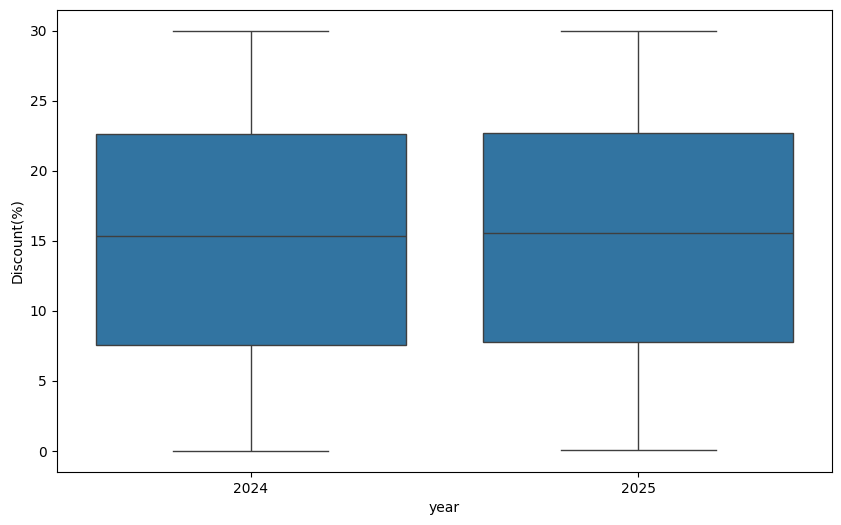

In [ ]:
print(df.isnull().sum())


df["date"] = pd.to_datetime(df["ReviewDate"], errors="coerce")
df = df.dropna(subset=["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="year", y="Discount(%)")

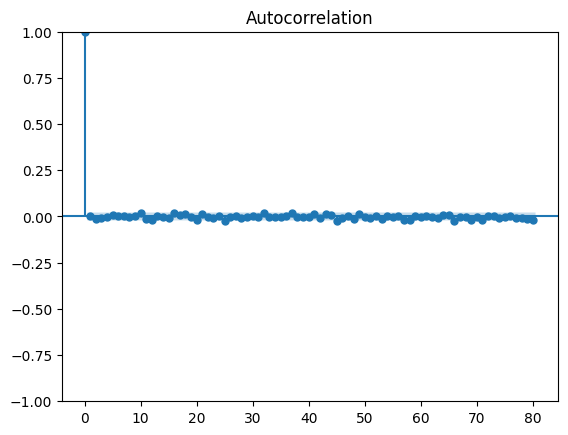

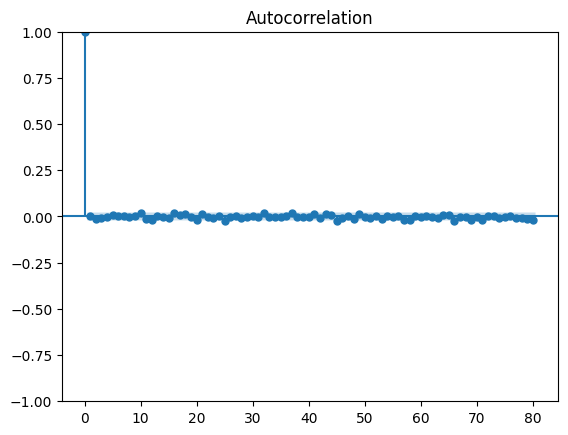

In [11]:
plot_acf(df["Discount(%)"], lags=80)

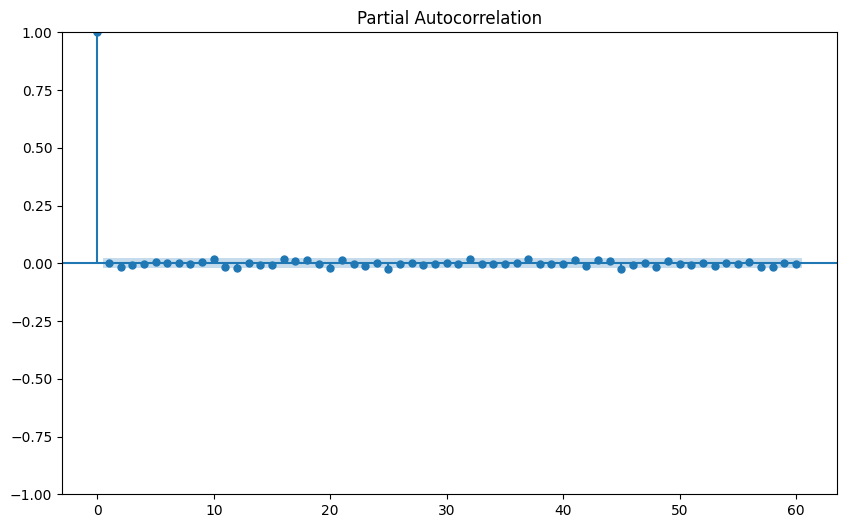

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(df["Discount(%)"], lags=60, ax=ax)
plt.show()

In [ ]:
df = df.set_index("date").sort_index()
result = adfuller(df["Discount(%)"].dropna())



print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Number of Observations:", result[3])
print("Critical Values:")

for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -25.41337822669173
p-value: 0.0
Lags Used: 19
Number of Observations: 8385
Critical Values:
   1%: -3.431130119622892
   5%: -2.861884759155493
   10%: -2.5669535104356567
